# Homework 13: Machine Learning Supervised Learning

### 1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

**Set-up and initial exploration**

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np

# Load in the bottle file
bottle_df = pd.read_csv('bottle.csv', low_memory=False)

# Load in the cast file
cast_df = pd.read_csv('cast.csv', low_memory=False)

In [2]:
# View the cast column list
cast_list = cast_df.columns
print(cast_list)

Index(['Cst_Cnt', 'Cruise_ID', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Cast_ID',
       'Sta_ID', 'Quarter', 'Sta_Code', 'Distance', 'Date', 'Year', 'Month',
       'Julian_Date', 'Julian_Day', 'Time', 'Lat_Dec', 'Lat_Deg', 'Lat_Min',
       'Lat_Hem', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Lon_Hem', 'Rpt_Line',
       'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D',
       'Secchi', 'ForelU', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Order_Occ',
       'Event_Num', 'Cruz_Leg', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num', 'IntChl',
       'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone',
       'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer',
       'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'],
      dtype='object')


In [3]:
# view the bottle column list
bottle_list = bottle_df.columns
print(bottle_list)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [7]:
# Create an empty list to append matching vars
match_list = []

# Iterate through var names in cast
for cast in cast_list:
    # Iterate through var names in bottle
    for bottle in bottle_list:
        # Check if a var name in cast is equal to a var name in bottle
        if cast == bottle:
            # Append the matches to our list
            match_list.append(bottle)
            
# print list to view
print(match_list)

# 'Cst_Cnt' and 'Sta_ID' appear to be the only two columns we would want to join on

['Cst_Cnt', 'Sta_ID']


In [8]:
# View the matching columns from cast
cast_df[['Cst_Cnt', 'Sta_ID']].head()

cast_df['Cst_Cnt'].nunique() # 34404 unique
cast_df['Sta_ID'].nunique() # 2634 unique

len(cast_df.index) # 34404 rows

34404

In [9]:
# View the matching columns from bottle
bottle_df[['Cst_Cnt', 'Sta_ID']].head()

bottle_df['Cst_Cnt'].nunique() # 34404 unique
bottle_df['Sta_ID'].nunique() # 2634 unique

len(bottle_df.index) # 864863

864863

The casting file represents the cast (or 'net') that contains many bottle samples. We can merge the two files on the cast count variable to gain more insight from the casting variables.

**Merge files into one df before pre-processing**

In [10]:
# left outer join so that we maintain all the rows in bottle, but match them to their Cst_Cnt from the other df
bottle_cast = pd.merge(bottle_df, cast_df, on='Cst_Cnt', how='left')
bottle_cast.head()

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [11]:
# Check the length of the new data frame
len(bottle_cast.index) # We remain with 864863 rows

864863

### Preprocessing

In [12]:
# View basic summary
bottle_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864863 entries, 0 to 864862
Columns: 134 entries, Cst_Cnt to Visibility
dtypes: float64(97), int64(15), object(22)
memory usage: 890.8+ MB


- There are 864,863 rows and 134 features
- Most variables are floats or integers
- 22 variables are non-numerical

**Clean null values**

With 134 columns, there are likely some features that will not be useful for an analysis. Having too many null values could hinder any predictive results that we find. Therefore, as part of the pre-processing step, I will remove columns that have more than 50% null values

In [13]:
# Which features contain null values?

# Create empty list to append null values
null_vars = []

# Iterate through columns and values of data frame
for col, val in bottle_cast.iteritems():
    # If there are any nulls...
    if bottle_cast[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_vars.append(col)

# View the columns with null values
print(null_vars)

['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'Distance', 'Time', 'Bottom_D', 'Secchi', 'ForelU', 'Ship_Name', 'Order_Occ', 'Event_Num', 'Cruz_Leg', 'Data_Or', 'IntChl', 'IntC14', 'Inc_Str', 'Inc_End', 'PST_LAN', 'Civil_T', 'TimeZone', 'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility']


In [14]:
# Of that list, which columns have more than half of their values as null?

# Empty list for columns with >50% null values
null_vars50 = []

# Iterate through the list of nulls
for col in null_vars:
    # Divide the number of nulls by the total values in the data set
    # Multiply by 100 and round by 2 decimal points for percentage
    percent_null = round((((bottle_cast[col].isnull().sum())/864863)*100),2)
    
    # Search for only columns that have more than 50% missing values
    if percent_null >= 50:
        # print the results in a format that is easy to read
        print(f'{col}: {percent_null}%')
        # append those columns to a new list
        null_vars50.append(col)
    
print(null_vars50)

BtlNum: 86.28%
T_qual: 97.33%
S_qual: 91.34%
O_qual: 78.65%
SThtaq: 92.39%
O2Satq: 74.82%
ChlorA: 73.95%
Phaeop: 73.95%
PO4uM: 52.21%
SiO3uM: 59.06%
NO2uM: 60.97%
NO3uM: 60.99%
NH3uM: 92.49%
C14As1: 98.33%
C14A1p: 98.52%
C14As2: 98.33%
C14A2p: 98.53%
DarkAs: 97.38%
DarkAp: 97.63%
MeanAs: 97.38%
MeanAp: 97.63%
IncTim: 98.33%
LightP: 97.84%
R_SIO3: 59.06%
R_PO4: 52.21%
R_NO3: 60.99%
R_NO2: 60.97%
R_NH4: 92.49%
R_CHLA: 73.95%
R_PHAEO: 73.95%
R_SAMP: 85.89%
DIC1: 99.77%
DIC2: 99.97%
TA1: 99.76%
TA2: 99.97%
pH2: 100.0%
pH1: 99.99%
DIC Quality Comment: 99.99%
Secchi: 84.59%
ForelU: 94.34%
Order_Occ: 69.29%
Cruz_Leg: 95.66%
IntChl: 61.7%
IntC14: 93.94%
Inc_Str: 93.93%
Inc_End: 93.93%
PST_LAN: 93.99%
Civil_T: 93.99%
TimeZone: 85.87%
Wave_Dir: 64.98%
Wave_Ht: 65.97%
Wave_Prd: 67.02%
Cloud_Typ: 70.94%
Cloud_Amt: 66.18%
Visibility: 72.78%
['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C1

In [15]:
# Now, we can remove those features from the data set

# Create a new df that has all columns from 'null_bottle50' removed
bottle_cast_df = bottle_cast.drop(null_vars50, axis=1)
bottle_cast_df.head()

# Now, we have 79 workable columns!

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,1.0,054 56,NaN,4903,23.0,18.0,NaN,NaN,NaN,2.0


**Handle Missing Data**

Although we removed columns with >50% nulls, we still have a lot of missing values in our data set that we need to handle. For all numeric columns, we will fill the NAs with the median value. 

In [16]:
# Create new list that contains columns that still have null values, after having dropped those with >50% null

# Create empty list to append remaining null values
null_revised = []

# Iterate through columns and values of data frame
for col, val in bottle_cast_df.iteritems():
    # If there are any nulls...
    if bottle_cast_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_revised.append(col)

# View the columns with null values
print(null_revised)

['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'T_prec', 'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'Distance', 'Time', 'Bottom_D', 'Ship_Name', 'Event_Num', 'Data_Or', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea']


In [17]:
# View data types for those columns
for var in null_revised:
    print(bottle_cast_df[var].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
object
float64
object
float64
float64
float64
float64
float64
float64


In [18]:
# import statistics to use median function
import statistics as st

# Iterate through variables to fill the NAs with their median
for var in null_revised:
    # If an item in the null list is not an object...
    if bottle_cast_df[var].dtypes != 'O':
        # Fill the null value with median
        bottle_cast_df[var].fillna(st.median(bottle_cast_df[var]), inplace=True)
    else:
        # Fill categorical values with 999, which universally means 'unknown'
        bottle_cast_df[var].fillna(999)

In [19]:
# Check to see which columns still have nulls
still_null = []

# Iterate through columns and values of data frame
for col, val in bottle_cast_df.iteritems():
    # If there are any nulls...
    if bottle_cast_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        still_null.append(col)

for var in still_null:
    print(f'{var}: {bottle_cast_df[var].dtypes}')

O2ml_L: float64
O2Sat: float64
Oxy_µmol/Kg: float64
R_O2: float64
R_O2Sat: float64
Distance: float64
Time: object
Ship_Name: object
Data_Or: object
Wind_Dir: float64


In [20]:
# List of float values 
# For these values, we will fill NA with the mean, rather than the median
mean_list = ['O2ml_L', 'O2Sat', 'Oxy_µmol/Kg', 'R_O2', 'R_O2Sat', 'Distance', 'Wind_Dir']

# Iterate through variables to fill the NAs with their mean
for var in mean_list:
    bottle_cast_df[var].fillna(np.mean(bottle_cast_df[var]), inplace=True)

In [21]:
# Check to see which columns still have nulls
still_null2 = []

# Iterate through columns and values of data frame
for col, val in bottle_cast_df.iteritems():
    # If there are any nulls...
    if bottle_cast_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        still_null2.append(col)

for var in still_null2:
    print(f'{var}: {bottle_cast_df[var].dtypes}')

Time: object
Ship_Name: object
Data_Or: object


Now, we need to fill in the missing values on our objects

In [22]:
# Fill all of the nulls in the time column with an empty time
bottle_cast_df['Time'].fillna('00:00:00', inplace=True)

# Fill the missing ship names with 'Unknown'
bottle_cast_df['Ship_Name'].fillna('Unknown', inplace=True)

# Fill the missing Data_Or values with 'Uknown'
bottle_cast_df['Data_Or'].fillna('Unknown', inplace=True)

In [23]:
bottle_cast_df[['Time', 'Ship_Name', 'Data_Or']].isnull().sum()

Time         0
Ship_Name    0
Data_Or      0
dtype: int64

In [24]:
# Final check to see if there are any nulls
for col, var in bottle_cast_df.iteritems():
    if bottle_cast_df[col].isnull().sum() > 0:
        print(col)
# Nothing printed! Woohoo!

**Convert Categorical Values to Numeric**

Now that we have removed columns with >50% missing, and now that we have filled in all the remaining null values, we can convert any non-numeric features to be numeric

In [227]:
# Empty list to append categorical values to
cat_list = []

# Iterate through variables to see which are object types (everything else is int or float)
for col, val in bottle_cast_df.iteritems():
    # Check which are objects
    if bottle_cast_df[col].dtypes == 'O':
        # Append to list
        cat_list.append(col)
        
# print the list
print(cat_list)

['Sta_ID_x', 'Depth_ID', 'Cruise_ID', 'Cast_ID', 'Sta_ID_y', 'Sta_Code', 'Date', 'Time', 'Lat_Hem', 'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type', 'Orig_Sta_ID', 'Data_Or', 'Cruz_Num']


In [228]:
# View all of the features that are categorical
bottle_cast_df[cat_list].head()

,Sta_ID_x,Depth_ID,Cruise_ID,Cast_ID,Sta_ID_y,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Data_Or,Cruz_Num
0,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,Unknown,4903
1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,Unknown,4903
2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,Unknown,4903
3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,Unknown,4903
4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,1949-03-01-C-31CR,19-4903CR-HY-060-0930-05400560,054.0 056.0,NST,03/01/1949,09:30:00,N,W,CREST,31CR,HY,054 56,Unknown,4903


In [203]:
# 1. Fill times with 00:00:00
# 2. Fill ship name with 'Unknown'
# 3. Fill Data_Or with 'Unknown' (just drop this one)

420655/864863

0.4863833925141901

In [201]:
bottle_cast_df['Hour']= pd.to_datetime(bottle_cast_df['Time'], format='%H:%M').dt.hour
bottle_cast_df['Hour'].head()

0    9.0
1    9.0
2    9.0
3    9.0
4    9.0
Name: Hour, dtype: float64

In [ ]:
bottle_cast_df['Hour']= pd.to_datetime(bottle_cast_df['Time'], format='%H:%M').dt.hour
bottle_cast_df['Hour'].head()

## Bottle Pre-processing

In [27]:
# Confirm number of entries
bottle.index

<function str.index>

In [82]:
# View data summary
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

**Clean up Null Values**

With 74 columns, there are likely some features that will not be useful for an analysis. Having too many null values could hinder any predictive results that we find. Therefore, as part of the pre-processing step, I will remove columns that have more than 50% null values

In [26]:
# Which features contain null values?

# Create empty list to append null values
null_bottle = []

# Iterate through columns and values of data frame
for col, val in bottle.iteritems():
    # If there are any nulls...
    if bottle[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_bottle.append(col)

# View the columns with null values
print(null_bottle)

AttributeError: 'str' object has no attribute 'iteritems'

In [84]:
# Of that list, which columns have more than half of their values as null?

# Empty list for columns with >50% null values
null_bottle50 = []

# Iterate through the list of nulls
for col in null_bottle:
    # Divide the number of nulls by the total values in the data set
    # Multiply by 100 and round by 2 decimal points for percentage
    percent_null = round((((bottle[col].isnull().sum())/864863)*100),2)
    
    # Search for only columns that have more than 50% missing values
    if percent_null >= 50:
        # print the results in a format that is easy to read
        print(f'{col}: {percent_null}%')
        # append those columns to a new list
        null_bottle50.append(col)
    
print(null_bottle50)

BtlNum: 86.28%
T_qual: 97.33%
S_qual: 91.34%
O_qual: 78.65%
SThtaq: 92.39%
O2Satq: 74.82%
ChlorA: 73.95%
Phaeop: 73.95%
PO4uM: 52.21%
SiO3uM: 59.06%
NO2uM: 60.97%
NO3uM: 60.99%
NH3uM: 92.49%
C14As1: 98.33%
C14A1p: 98.52%
C14As2: 98.33%
C14A2p: 98.53%
DarkAs: 97.38%
DarkAp: 97.63%
MeanAs: 97.38%
MeanAp: 97.63%
IncTim: 98.33%
LightP: 97.84%
R_SIO3: 59.06%
R_PO4: 52.21%
R_NO3: 60.99%
R_NO2: 60.97%
R_NH4: 92.49%
R_CHLA: 73.95%
R_PHAEO: 73.95%
R_SAMP: 85.89%
DIC1: 99.77%
DIC2: 99.97%
TA1: 99.76%
TA2: 99.97%
pH2: 100.0%
pH1: 99.99%
DIC Quality Comment: 99.99%
['BtlNum', 'T_qual', 'S_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Phaeop', 'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 'DarkAs', 'DarkAp', 'MeanAs', 'MeanAp', 'IncTim', 'LightP', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']


In [85]:
# Now, we can remove those features from the data set

# Create a new df that has all columns from 'null_bottle50' removed
bottle_df = bottle.drop(null_bottle50, axis=1)
bottle_df.head()

# Now, we have 36 workable columns!

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,20


In [86]:
bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

**Handle Missing Data**

Although we removed columns with >50% nulls, we still have a lot of missing values in our data set that we need to handle. For all numeric columns, we will fill the NAs with the median value. 

Neither of the categorical columns have missing data, so we can leave those alone

In [175]:
# Create new list that contains columns that still have null values

# Create empty list to append remaining null values
null_bottle_revised = []

# Iterate through columns and values of data frame
for col, val in bottle_df.iteritems():
    # If there are any nulls...
    if bottle_df[col].isnull().sum() > 0:
        # Append the column name to the null list
        null_bottle_revised.append(col)

# View the columns with null values
print(null_bottle_revised)

for var in null_bottle_revised:
    print(var)

['T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']
T_degC
Salnty
O2ml_L
STheta
O2Sat
Oxy_µmol/Kg
BtlNum
T_prec
T_qual
S_prec
S_qual
P_qual
O_qual
SThtaq
O2Satq
ChlorA
Chlqua
Phaeop
Phaqua
PO4uM
PO4q
SiO3uM
SiO3qu
NO2uM
NO2q
NO3uM
NO3q
NH3uM
NH3q
C14As1
C14A1p
C14A1q
C14As2
C14A2p
C14A2q
DarkAs
DarkAp
DarkAq
MeanAs
MeanAp
MeanAq
IncTim
LightP
R_TEMP
R_POTEMP
R_SALINITY
R_SIGMA
R_SVA
R_DYNHT
R_O2


In [103]:
# import statistics to use median function
import statistics as st

# Iterate through variables to fill the NAs with their median
for var in null_bottle_revised:
    bottle_df[var].fillna(st.median(bottle_df[var]), inplace=True)

In [104]:
# 5 of the variables have nan as their median, so fill with mean instead

bottle_df.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC              0
Salnty              0
O2ml_L         168662
STheta              0
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec              0
S_prec              0
P_qual              0
Chlqua              0
Phaqua              0
PO4q                0
SiO3qu              0
NO2q                0
NO3q                0
NH3q                0
C14A1q              0
C14A2q              0
DarkAq              0
MeanAq              0
R_Depth             0
R_TEMP              0
R_POTEMP            0
R_SALINITY          0
R_SIGMA             0
R_SVA               0
R_DYNHT             0
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [106]:
mean_list = ['O2ml_L', 'O2Sat', 'Oxy_µmol/Kg', 'R_O2', 'R_O2Sat']

# Iterate through variables to fill the NAs with their mean
for var in mean_list:
    bottle_df[var].fillna(np.mean(bottle_df[var]), inplace=True)

In [107]:
# Now, all nulls have been removed
bottle_df.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64

**Convert Categorical Data to Numeric**

Now that the missing data have been handled, we can focus on converting the categorical data to numeric. First, we need to see how many features are categorical.

The code below displays that only two of the variables are categorical:
- Sta_ID
- Depth_ID

In [110]:
# Find which variables are categorical

# Iterate through data frame
for col, val in bottle_df.iteritems():
    # If the column type is an object...
    if bottle_df[col].dtype == 'O':
        # print the column names
        print(col)

Sta_ID
Depth_ID


In [115]:
# Convert categorical to numeric

# There are only two non-numeric features. Let's take a look at them below!
bottle_df[['Sta_ID', 'Depth_ID']].head()

# For Sta_ID column, the first value is the 'Line' and the next value is the 'Station' (according to Kaggle.com)
        # Therefore, we can separate this column into two columns, with one being 'line' and the other 'station'
        # There are 2634 unique values, so it does not make sense to do a new code for each one

# Create new column called "Sta_line"
# Look to see where the column contains a space
bottle_df['Sta_line'] = np.where(bottle_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the first string
                                bottle_df['Sta_ID'].str.split(' ').str[0],
                                # else, return the original column value
                                bottle_df['Sta_ID'])

bottle_df['Sta_station'] = np.where(bottle_df['Sta_ID'].str.contains(' '),
                                # split where the space is and only grab the second string
                                bottle_df['Sta_ID'].str.split(' ').str[1],
                                # else, return the original column value
                                bottle_df['Sta_ID'])

# Confirm results
bottle_df[['Sta_line', 'Sta_station', 'Sta_ID']].head()

,Sta_line,Sta_station,Sta_ID
0,054.0,056.0,054.0 056.0
1,054.0,056.0,054.0 056.0
2,054.0,056.0,054.0 056.0
3,054.0,056.0,054.0 056.0
4,054.0,056.0,054.0 056.0


In [123]:
# Change the data types to be numeric
bottle_df['Sta_line'] = pd.to_numeric(bottle_df['Sta_line'])
bottle_df['Sta_station'] = pd.to_numeric(bottle_df['Sta_station'])

# Check the data types
bottle_df[['Sta_line', 'Sta_station']].dtypes

Sta_line       float64
Sta_station    float64
dtype: object

In [124]:
# Drop the Sta_ID variable, now that we no longer need it
bottle_df = bottle_df.drop('Sta_ID', axis=1)

In [128]:
# Check the depth_ID variable
bottle_df['Depth_ID'].head()

0    19-4903CR-HY-060-0930-05400560-0000A-3
1    19-4903CR-HY-060-0930-05400560-0008A-3
2    19-4903CR-HY-060-0930-05400560-0010A-7
3    19-4903CR-HY-060-0930-05400560-0019A-3
4    19-4903CR-HY-060-0930-05400560-0020A-7
Name: Depth_ID, dtype: object

In [3]:
# View first few rows of cast data
cast.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


**2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.** 

In [129]:
bottle_df.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line,Sta_station
Cst_Cnt,1.000000,0.999345,-0.162222,0.094036,-0.172835,0.146288,-0.131097,0.122815,0.132695,-0.100142,...,-0.016025,-0.172380,-0.145558,0.113221,-0.079260,0.146307,0.120155,-0.161961,-0.173673,-0.009522
Btl_Cnt,0.999345,1.000000,-0.161617,0.094881,-0.170271,0.144570,-0.130531,0.121268,0.130957,-0.100828,...,-0.015147,-0.169822,-0.144994,0.112864,-0.079608,0.144590,0.118613,-0.161348,-0.169601,-0.009445
Depthm,-0.162222,-0.161617,1.000000,-0.670283,0.536874,-0.532769,0.550979,-0.512682,-0.507193,0.082316,...,-0.587216,0.535529,0.571514,-0.632588,0.812402,-0.532769,-0.511864,0.999994,-0.012335,0.156867
T_degC,0.094036,0.094881,-0.670283,1.000000,-0.477736,0.705204,-0.801326,0.741215,0.693237,-0.065066,...,0.882294,-0.476515,-0.833620,0.933781,-0.725686,0.705204,0.738129,-0.668970,0.232773,-0.038269
Salnty,-0.172835,-0.170271,0.536874,-0.477736,1.000000,-0.716301,0.568785,-0.706623,-0.737114,0.062819,...,-0.499100,0.997441,0.591642,-0.689909,0.657913,-0.716302,-0.704850,0.535656,0.333165,-0.055796
O2ml_L,0.146288,0.144570,-0.532769,0.705204,-0.716301,1.000000,-0.668659,0.965814,0.972406,-0.069505,...,0.647468,-0.714429,-0.690765,0.778705,-0.641349,0.999998,0.968817,-0.531240,-0.104049,0.077666
STheta,-0.131097,-0.130531,0.550979,-0.801326,0.568785,-0.668659,1.000000,-0.708195,-0.679128,0.061464,...,-0.704559,0.567361,0.956764,-0.846224,0.621323,-0.668660,-0.702958,0.549788,-0.048859,-0.016753
O2Sat,0.122815,0.121268,-0.512682,0.741215,-0.706623,0.965814,-0.708195,1.000000,0.993336,-0.060928,...,0.724098,-0.704774,-0.731062,0.834713,-0.672946,0.965813,0.994242,-0.511196,-0.056668,0.070874
Oxy_µmol/Kg,0.132695,0.130957,-0.507193,0.693237,-0.737114,0.972406,-0.679128,0.993336,1.000000,-0.062734,...,0.677377,-0.735186,-0.700614,0.798867,-0.665640,0.972405,0.987659,-0.505668,-0.097518,0.076718
RecInd,-0.100142,-0.100828,0.082316,-0.065066,0.062819,-0.069505,0.061464,-0.060928,-0.062734,1.000000,...,-0.046483,0.062746,0.058645,-0.064246,0.074406,-0.069504,-0.062135,0.082183,-0.002310,0.034755


In [130]:
import warnings
warnings.filterwarnings('ignore')

# First get the correlations from our data frame
# I am taking the absolute value because for the purposes of gaining insight from a correlation matrix, and knowing
   ### which variables won't work in our model, the direction of the correlation is not very important. 
   ### what we care about most is the magnitude of the correlation. 
   ### Additionally, this will make the resulting heat map much easier to read so that strong negative correlations are 
    ### represented visually the same as strong positive correlations
bottle_corr = abs(bottle_df.corr())

# Reading code line from inside out...
        # Get the shape of loans_corr (it is a 10x10 matrix)
        # Use np.ones to replace all values with ones in the same shape as loans_corr (10,10 matrix)
        # Wrap inside np.triu, in order to create an upper triangle of the matrix
                # Upper diagonal of matrix are now 1s and lower diagonal of matrix are zeros
        # Create boolean where 1s are 'true' and 0s are 'false' (this is needed for mask function in next step)
        # mask the resulting array to be the same shape/type as the original loans_corr
                # We are only maintaining the values, where the boolean would be 'false'
bottle_corr_tri = bottle_corr.mask(np.triu(np.ones(bottle_corr.shape)).astype(np.bool))
bottle_corr_tri

# Now, we no longer have the duplicates, nor the perfect correlations!

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line,Sta_station
Cst_Cnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Btl_Cnt,0.999345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depthm,0.162222,0.161617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_degC,0.094036,0.094881,0.670283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salnty,0.172835,0.170271,0.536874,0.477736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2ml_L,0.146288,0.144570,0.532769,0.705204,0.716301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STheta,0.131097,0.130531,0.550979,0.801326,0.568785,0.668659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2Sat,0.122815,0.121268,0.512682,0.741215,0.706623,0.965814,0.708195,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oxy_µmol/Kg,0.132695,0.130957,0.507193,0.693237,0.737114,0.972406,0.679128,0.993336,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecInd,0.100142,0.100828,0.082316,0.065066,0.062819,0.069505,0.061464,0.060928,0.062734,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Drop the first row and the last column, since those are only NAs
bottle_corr_tri = bottle_corr_tri.drop(index='Cst_Cnt', columns='Sta_station')
bottle_corr_tri.head(10)

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Sta_line
Btl_Cnt,0.999345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depthm,0.162222,0.161617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_degC,0.094036,0.094881,0.670283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salnty,0.172835,0.170271,0.536874,0.477736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2ml_L,0.146288,0.144570,0.532769,0.705204,0.716301,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STheta,0.131097,0.130531,0.550979,0.801326,0.568785,0.668659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2Sat,0.122815,0.121268,0.512682,0.741215,0.706623,0.965814,0.708195,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oxy_µmol/Kg,0.132695,0.130957,0.507193,0.693237,0.737114,0.972406,0.679128,0.993336,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecInd,0.100142,0.100828,0.082316,0.065066,0.062819,0.069505,0.061464,0.060928,0.062734,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_prec,0.068282,0.063216,0.019953,0.039526,0.018146,0.000535,0.024126,0.004657,0.002683,0.04138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


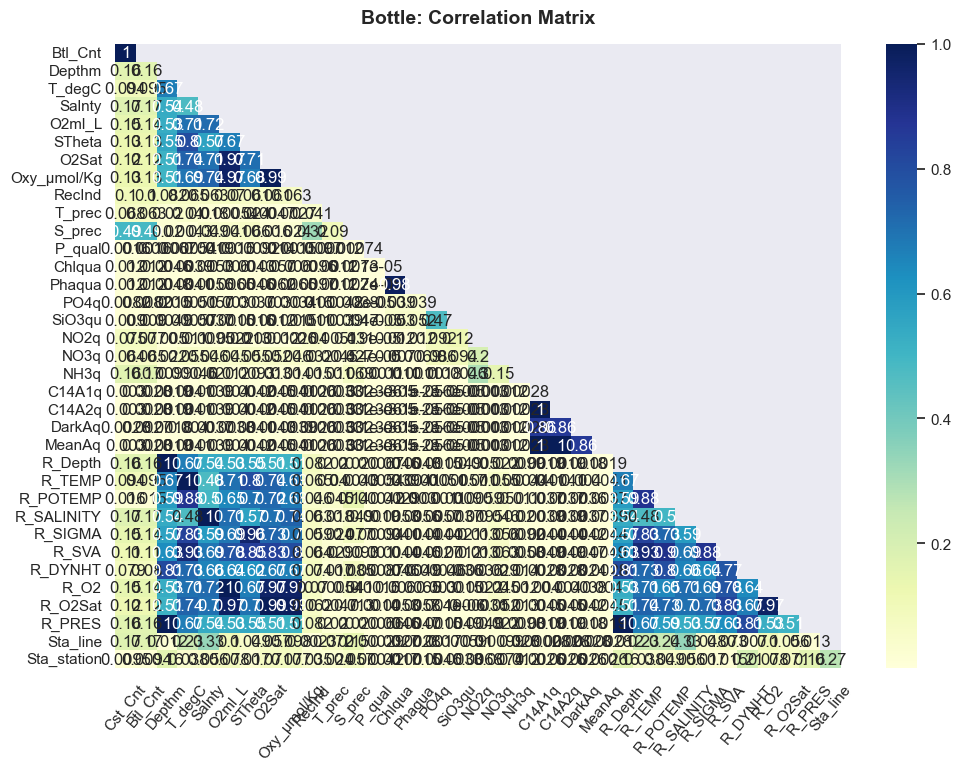

In [134]:
# load necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Visually display the matrix from above
# use the yellow-green-blue color map so that high correlations are more easily identifiable
h = sns.heatmap(bottle_corr_tri, annot=True,
              cmap="YlGnBu")

# Add plot title 
h.set_title('Bottle: Correlation Matrix', size=14, weight='bold', pad=15)

# rotate tick marks so they are easier to read
plt.xticks(rotation=50)

# Make plots larger
#plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':100})

# Display plot
plt.show()

**3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity.** 

In [273]:
# Need bottle file: T_degC (water temperature) and Salnty (water salinity)

# Import LinearRegression and Train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set up independent variable
X = np.array(bottle_cast_df['Salnty']).reshape(-1,1)
# Set up dependent variable
y = np.array(bottle_cast_df['T_degC']).reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# List of predicted values
y_pred

array([[ 7.78860894],
       [ 7.24878397],
       [ 8.77378952],
       ...,
       [ 7.49620375],
       [12.18368395],
       [ 9.12017722]])

**4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics.** 

In [274]:
# Import r2_score and mean_square_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Calculate the mean squared
mse = mean_squared_error(y_test, y_pred)
mse_val = round(mse,2)
print(f'Mean squared error: {mse_val}')

# get r-squared value to measure performance
r2 = r2_score(y_test, y_pred)
r2_val = round((r2),2)
print(f'R2 value: {r2_val}')

# Calculate R value, just to confirm results and see basic correlation direction
corr_coeff = pearsonr(bottle_cast_df['Salnty'],bottle_cast_df['T_degC'])
print(f'R value: {round(corr_coeff[0],2)}')

Mean squared error: 13.87
R2 value: 0.23
R value: -0.48


The **mean squared error** is approximately 13.87, which indicates a moderate difference between our actual and predicted values. Our model definitely contains errors that we would want to minimize further if possible. We would need to compare the mean squared error of this model to another to see which is better. The lower the mean squared error, the better the model. 

The **R-squared value** is about 0.23. This indicates that approximately 23% of the variability in water temperature can be explained by water salinity. Given that this value is fairly low, we would likely want to refine our model. We might need to add a few more independent variables and conduct a multiple linear regression instead. Or, we might find that water salinity is not useful in our model at all, for predicting water temperature. More testing and analysis would need to be done to determine this.

Additionally, the **Correlation coefficient** indicates a moderate negative correlation between water temperature and salinity. This further indicates that a simple linear model might not be the best way to represent the relationship between water salinity and water temperature.

**5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.** 

In [275]:
# Reshape the x and y variables to prepare for plotting in seaborn
x_reshaped=X_test.reshape(-1)
y_reshaped=y_test.reshape(-1)

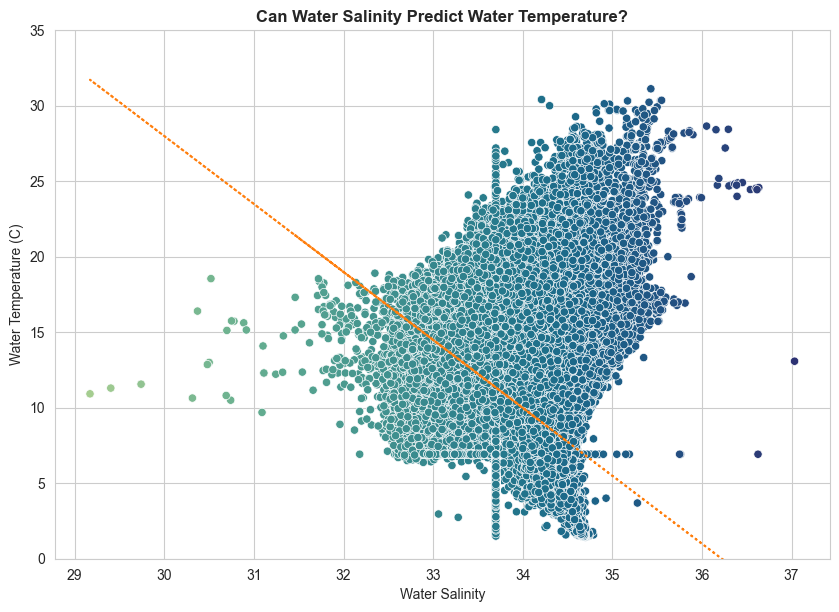

In [243]:
# Set up plot size
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})

# Add gridlines so that values are easier to read
sns.set_style("whitegrid")

# Create scatter plot of our actual values
# Reshape into 1-dimension to be used in Seaborn
g = sns.scatterplot(x=x_reshaped, 
                    y=y_reshaped,
                   hue=X_test.reshape(-1),
                   palette='crest',
                   legend=False)

# Set the titles of the plot and the axes
g.set_title('Can Water Salinity Predict Water Temperature?', weight='bold')
g.set_ylabel('Water Temperature (C)')
g.set_xlabel('Water Salinity')

# Plot the regression line (trend line)
plt.plot(X_test, y_pred, color = 'tab:orange', linestyle='dotted')
# Set range of y-axis
plt.ylim(0, 35)

# Display plot
plt.show()

**6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ .**

Polynomial regression is a method for fitting a more accurate trendline to your data, when a straight, simple linear line to the 1st order will not suffice. Despite the polynomial trendline becomming curved, it is technically still a form of linear regression. 

To conduct the polynomial regression, the input data must first be transformed to the nth order. However, it is important to note that an order greater than 4 is rarely ever necessary. The transformation would include raising your input variable (x) to the nth degree, depending on what order you are raising your data to. With each degree of x, you are adding a new feature to your model. For example, transforming you input (x) to the 3rd degree would *add* two new features, with a total of three features in your model: 1) The original value of x; 2) x to the power of 2; and 3) x to the power of 3.

**7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.** 

In [276]:
# Import the polynomial features function
from sklearn.preprocessing import PolynomialFeatures

# Set up independent variable (same as before); call X2 to differentiate
X2 = np.array(bottle_cast_df['Salnty']).reshape(-1,1)
# Set up dependent variable (same as before); call y2 to differentiate
y2 = np.array(bottle_cast_df['T_degC']).reshape(-1,1)

# Set up the polynomial features classifier to the 5th degree
poly_features= PolynomialFeatures(degree=5)
# Fit the classifier to our X2 value (water salinity)
x_poly = poly_features.fit_transform(X2)

# Create training and test sets
# Use the transformed x-value (x_poly) when splitting the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly, y2, test_size = 0.3, random_state=42)

# Create the regressor
reg2 = LinearRegression()

# Fit the regressor to the revised training data
reg2.fit(X_train2, y_train2)

# Predict on the revised testing data
y_pred_poly = reg2.predict(X_test2)

In [277]:
# Calculate the revised mean squared
mse = mean_squared_error(y_test2, y_pred_poly)
mse_val = round(mse,2)
print(f'Revised Mean squared error: {mse_val}')

# get r-squared value to measure performance
r2 = r2_score(y_test2, y_pred_poly)
r2_val = round((r2),2)
print(f'Revised R2 value: {r2_val}')

Revised Mean squared error: 11.87
Revised R2 value: 0.34


After applying a polynomial transformation to our data and re-running the regression...there is a slightly improvement in our model. The mean squared error was reduced to 11.87 (down from 13.87 in the previous model). Additionally, water salinity now accounts for 34% of the variability in water temperature, when using this revised model. With the other model, it only explained 23% of the variability.

I chose the 5th degree because this was the lowest order with the highest performance. Starting from the 1st order, with each order increase, the r-squared value increased and the mean squared error decreased. However, once I got to an order of 6, there was little to no difference in performance. Thus, I settled on an order of 5 for this model.

Additionally, I experimented with different order on the plot below before settling on 5. None of them seem to be a great fit, but the model looked best with a 5th order, compared to others.

**8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved.**

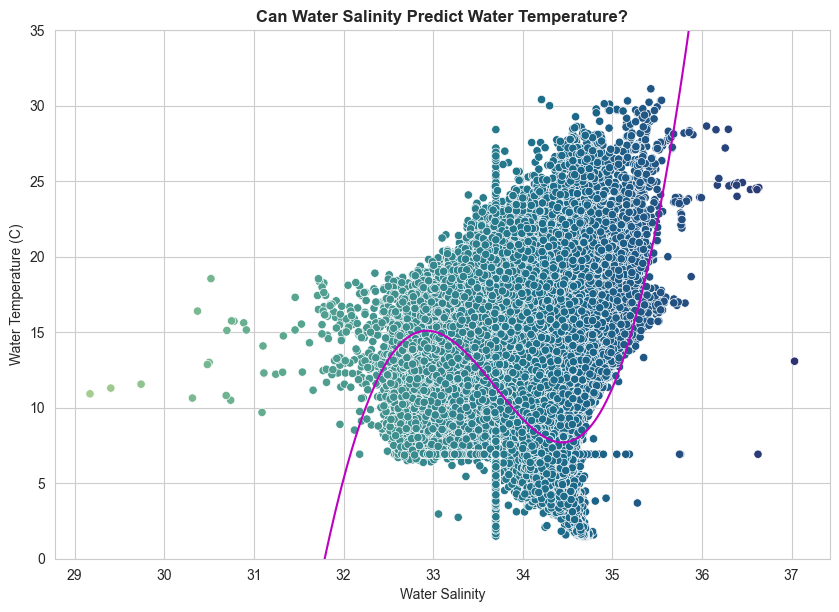

In [278]:
import operator

# Set up plot size
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})

# Add gridlines so that values are easier to read
sns.set_style("whitegrid")

# Create scatter plot of our actual values
# Retain the same testing data from previous question, so that we can have our original data points
g = sns.scatterplot(x=x_reshaped, 
                    y=y_reshaped,
                   hue=X_test.reshape(-1),
                   palette='crest',
                   legend=False)

# Set the titles of the plot and the axes
g.set_title('Can Water Salinity Predict Water Temperature?', weight='bold')
g.set_ylabel('Water Temperature (C)')
g.set_xlabel('Water Salinity')


# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_pred_poly), key=sort_axis)
X_test, y_pred_poly = zip(*sorted_zip)
plt.plot(X_test, y_pred_poly, color='m')

# Set range of y-axis
plt.ylim(0, 35)
plt.show()

In [ ]:
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_pred_poly), key=sort_axis)
X_test, y_pred_poly = zip(*sorted_zip)
plt.plot(X_test, y_pred_poly, color='m')

# Set range of y-axis
plt.ylim(0, 35)
plt.show()